In [39]:
import polars as pl
import plotly.express as px

In [17]:
batting = pl.scan_csv('../../csvs/batting.csv', infer_schema_length=None)
players = pl.scan_csv('../../csvs/allplayers.csv', infer_schema_length=None)

In [18]:
batting.count().collect()

shape: (1, 39)
┌─────────┬─────────┬─────────┬─────────┬───┬─────────┬──────────┬─────────┬─────────┐
│ gid     ┆ id      ┆ team    ┆ b_lp    ┆ … ┆ tie     ┆ gametype ┆ box     ┆ pbp     │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆   ┆ ---     ┆ ---      ┆ ---     ┆ ---     │
│ u32     ┆ u32     ┆ u32     ┆ u32     ┆   ┆ u32     ┆ u32      ┆ u32     ┆ u32     │
╞═════════╪═════════╪═════════╪═════════╪═══╪═════════╪══════════╪═════════╪═════════╡
│ 5615443 ┆ 5615443 ┆ 5615443 ┆ 5172866 ┆ … ┆ 5615443 ┆ 5615443  ┆ 5593150 ┆ 5264645 │
└─────────┴─────────┴─────────┴─────────┴───┴─────────┴──────────┴─────────┴─────────┘

In [8]:
batting.tail(5).collect()

shape: (5, 39)
┌──────────────┬──────────┬──────┬──────┬───┬─────┬─────────────┬─────┬─────┐
│ gid          ┆ id       ┆ team ┆ b_lp ┆ … ┆ tie ┆ gametype    ┆ box ┆ pbp │
│ ---          ┆ ---      ┆ ---  ┆ ---  ┆   ┆ --- ┆ ---         ┆ --- ┆ --- │
│ str          ┆ str      ┆ str  ┆ i64  ┆   ┆ i64 ┆ str         ┆ str ┆ str │
╞══════════════╪══════════╪══════╪══════╪═══╪═════╪═════════════╪═════╪═════╡
│ NYA202410300 ┆ coleg001 ┆ NYA  ┆ null ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410300 ┆ holmc001 ┆ NYA  ┆ null ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410300 ┆ kahnt001 ┆ NYA  ┆ null ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410300 ┆ weavl001 ┆ NYA  ┆ null ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410300 ┆ leitm002 ┆ NYA  ┆ null ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
└──────────────┴──────────┴──────┴──────┴───┴─────┴─────────────┴─────┴─────┘

In [17]:
players.tail().collect()

shape: (5, 25)
┌──────────┬───────────┬────────┬─────┬───┬──────┬──────────┬──────────┬────────┐
│ id       ┆ last      ┆ first  ┆ bat ┆ … ┆ g_pr ┆ first_g  ┆ last_g   ┆ season │
│ ---      ┆ ---       ┆ ---    ┆ --- ┆   ┆ ---  ┆ ---      ┆ ---      ┆ ---    │
│ str      ┆ str       ┆ str    ┆ str ┆   ┆ i64  ┆ i64      ┆ i64      ┆ i64    │
╞══════════╪═══════════╪════════╪═════╪═══╪══════╪══════════╪══════════╪════════╡
│ zefer001 ┆ Zeferjahn ┆ Ryan   ┆ R   ┆ … ┆ 0    ┆ 20240825 ┆ 20240928 ┆ 2024   │
│ zerpa001 ┆ Zerpa     ┆ Angel  ┆ L   ┆ … ┆ 0    ┆ 20240328 ┆ 20241010 ┆ 2024   │
│ zubet001 ┆ Zuber     ┆ Tyler  ┆ R   ┆ … ┆ 0    ┆ 20240722 ┆ 20240728 ┆ 2024   │
│ zuluy001 ┆ Zulueta   ┆ Yosver ┆ R   ┆ … ┆ 0    ┆ 20240625 ┆ 20240924 ┆ 2024   │
│ zunig001 ┆ Zuniga    ┆ Guillo ┆ R   ┆ … ┆ 0    ┆ 20240328 ┆ 20240929 ┆ 2024   │
└──────────┴───────────┴────────┴─────┴───┴──────┴──────────┴──────────┴────────┘

In [21]:
players.filter((pl.col("last") == "Freeman") & (pl.col("first")=="Freddie")).collect()

shape: (23, 25)
┌──────────┬─────────┬─────────┬─────┬───┬──────┬──────────┬──────────┬────────┐
│ id       ┆ last    ┆ first   ┆ bat ┆ … ┆ g_pr ┆ first_g  ┆ last_g   ┆ season │
│ ---      ┆ ---     ┆ ---     ┆ --- ┆   ┆ ---  ┆ ---      ┆ ---      ┆ ---    │
│ str      ┆ str     ┆ str     ┆ str ┆   ┆ i64  ┆ i64      ┆ i64      ┆ i64    │
╞══════════╪═════════╪═════════╪═════╪═══╪══════╪══════════╪══════════╪════════╡
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 2    ┆ 20100901 ┆ 20101002 ┆ 2010   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20110331 ┆ 20110928 ┆ 2011   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20120405 ┆ 20121005 ┆ 2012   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 1    ┆ 20130401 ┆ 20131007 ┆ 2013   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 0        ┆ 0        ┆ 2013   │
│ …        ┆ …       ┆ …       ┆ …   ┆ … ┆ …    ┆ …        ┆ …        ┆ …      │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20220719 ┆ 20220719 ┆ 2022   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20230330 ┆ 20231011 ┆ 2023   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20230711 ┆ 20230711 ┆ 2023   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20240320 ┆ 20241030 ┆ 2024   │
│ freef001 ┆ Freeman ┆ Freddie ┆ L   ┆ … ┆ 0    ┆ 20240716 ┆ 20240716 ┆ 2024   │
└──────────┴─────────┴─────────┴─────┴───┴──────┴──────────┴──────────┴────────┘

In [24]:
batting.filter(pl.col("id")=="freef001").collect()

shape: (2_101, 39)
┌──────────────┬──────────┬──────┬──────┬───┬─────┬─────────────┬─────┬─────┐
│ gid          ┆ id       ┆ team ┆ b_lp ┆ … ┆ tie ┆ gametype    ┆ box ┆ pbp │
│ ---          ┆ ---      ┆ ---  ┆ ---  ┆   ┆ --- ┆ ---         ┆ --- ┆ --- │
│ str          ┆ str      ┆ str  ┆ i64  ┆   ┆ i64 ┆ str         ┆ str ┆ str │
╞══════════════╪══════════╪══════╪══════╪═══╪═════╪═════════════╪═════╪═════╡
│ ATL201009010 ┆ freef001 ┆ ATL  ┆ 6    ┆ … ┆ 0   ┆ regular     ┆ y   ┆ y   │
│ FLO201009030 ┆ freef001 ┆ ATL  ┆ 9    ┆ … ┆ 0   ┆ regular     ┆ y   ┆ y   │
│ FLO201009040 ┆ freef001 ┆ ATL  ┆ 8    ┆ … ┆ 0   ┆ regular     ┆ y   ┆ y   │
│ FLO201009050 ┆ freef001 ┆ ATL  ┆ 9    ┆ … ┆ 0   ┆ regular     ┆ y   ┆ y   │
│ PIT201009060 ┆ freef001 ┆ ATL  ┆ 9    ┆ … ┆ 0   ┆ regular     ┆ y   ┆ y   │
│ …            ┆ …        ┆ …    ┆ …    ┆ … ┆ …   ┆ …           ┆ …   ┆ …   │
│ LAN202410250 ┆ freef001 ┆ LAN  ┆ 3    ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ LAN202410260 ┆ freef001 ┆ LAN  ┆ 4    ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410280 ┆ freef001 ┆ LAN  ┆ 3    ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410290 ┆ freef001 ┆ LAN  ┆ 3    ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
│ NYA202410300 ┆ freef001 ┆ LAN  ┆ 3    ┆ … ┆ 0   ┆ worldseries ┆ y   ┆ y   │
└──────────────┴──────────┴──────┴──────┴───┴─────┴─────────────┴─────┴─────┘

In [17]:
# League wide batting average per year
df = (
    batting
    .with_columns(pl.col("date").cast(pl.String).str.strptime(pl.Date, "%Y%m%d").dt.year().alias("year"))
    .group_by("year")
    .agg(pl.col("b_h").sum(), pl.col("b_ab").sum())
    .with_columns((pl.col("b_h") / pl.col("b_ab")).alias("avg"))
    .sort("year")
    .collect()
)
df

shape: (124, 4)
┌──────┬───────┬────────┬──────────┐
│ year ┆ b_h   ┆ b_ab   ┆ avg      │
│ ---  ┆ ---   ┆ ---    ┆ ---      │
│ i32  ┆ i64   ┆ i64    ┆ f64      │
╞══════╪═══════╪════════╪══════════╡
│ 1901 ┆ 21279 ┆ 78375  ┆ 0.271502 │
│ 1902 ┆ 20769 ┆ 77694  ┆ 0.267318 │
│ 1903 ┆ 20237 ┆ 77259  ┆ 0.261937 │
│ 1904 ┆ 20543 ┆ 83301  ┆ 0.246612 │
│ 1905 ┆ 20475 ┆ 82649  ┆ 0.247734 │
│ …    ┆ …     ┆ …      ┆ …        │
│ 2020 ┆ 15269 ┆ 62575  ┆ 0.244011 │
│ 2021 ┆ 40113 ┆ 164516 ┆ 0.243824 │
│ 2022 ┆ 40258 ┆ 166229 ┆ 0.242184 │
│ 2023 ┆ 41517 ┆ 167232 ┆ 0.24826  │
│ 2024 ┆ 40495 ┆ 166603 ┆ 0.243063 │
└──────┴───────┴────────┴──────────┘

In [15]:
# Visualize with plotly
import plotly.express as px
fig = px.line(df, x="year", y="avg", title="League wide batting average per year", line_shape='spline')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'year=%{x}<br>avg=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid', 'shape': 'spline'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('bQcAAG4HAABvBwAAcAcAAHEHAAByBw' ... 'DkBwAA5QcAAOYHAADnBwAA6AcAAA=='),
                    'dtype': 'i4'},
              'xaxis': 'x',
              'y': {'bdata': ('t/H5kUtg0T+UXhC0vBvRP8Hqo+mTw9' ... '9u4v/OPwy64QD7xs8/uHjU964czz8='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'League wide batting average per year'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'avg'}}}
})

In [29]:
# Stadium differences
stadium = (
    batting
    .group_by("site")
    .agg(pl.col("b_h").sum(), pl.col("b_ab").sum())
    .with_columns((pl.col("b_h") / pl.col("b_ab")).alias("avg"))
    .filter(pl.col("b_ab") > 100000)
    .sort("avg")
    .collect()
)
stadium

shape: (57, 4)
┌───────┬────────┬────────┬──────────┐
│ site  ┆ b_h    ┆ b_ab   ┆ avg      │
│ ---   ┆ ---    ┆ ---    ┆ ---      │
│ str   ┆ i64    ┆ i64    ┆ f64      │
╞═══════╪════════╪════════╪══════════╡
│ SAN02 ┆ 26743  ┆ 112266 ┆ 0.238211 │
│ SEA03 ┆ 33430  ┆ 136949 ┆ 0.244105 │
│ LOS03 ┆ 89382  ┆ 364881 ┆ 0.244962 │
│ BAL11 ┆ 50292  ┆ 204503 ┆ 0.245923 │
│ OAK01 ┆ 76005  ┆ 307707 ┆ 0.247004 │
│ …     ┆ …      ┆ …      ┆ …        │
│ STL07 ┆ 138399 ┆ 501233 ┆ 0.276117 │
│ ARL02 ┆ 40702  ┆ 146773 ┆ 0.277313 │
│ PHI09 ┆ 57166  ┆ 198852 ┆ 0.28748  │
│ CLE06 ┆ 50032  ┆ 173064 ┆ 0.289095 │
│ DEN02 ┆ 49668  ┆ 168037 ┆ 0.295578 │
└───────┴────────┴────────┴──────────┘

In [30]:
# Visualize with plotly
px.bar(stadium, x="avg", y="site", title="Batting average by stadium", orientation='h')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'avg=%{x}<br>site=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': {'bdata': ('G65g/bJ9zj+9FQoZ2T7PP3dA56nqWs' ... '2SFRNm0j/m8PvWiYDSP92Oyvq+6tI/'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': array(['SAN02', 'SEA03', 'LOS03', 'BAL11', 'OAK01', 'HOU02', 'NYC17', 'STP01',
                          'SFO02', 'MIL06', 'SAN01', 'SFO03', 'HOU03', 'STL10', 'CLE07', 'ANA01',
                          'PHI13', 'MON02', 'CIN09', 'KAN05', 'ATL02', 'PHI12', 'CIN08', 'PIT08',
                          'MIL05', 'NYC16', 'MIA01', 'TOR02', 'CHI12', 'STL09', 'ARL01', 'PIT07',
                          'MIN02', 'CLE08', 'ATL01', 'PHO01', 'NYC14', 'BOS08', 'CHI10', 'CHI11',
                          'BAL12', 'DET05', 'SEA02', 'PHI11', 'CIN07', 'DET04', 'NYC15', 'WAS09',
                          'KAN06', 'PIT06', 'BOS07', 'MIN03', 'STL07', 'ARL02', 'PHI09', 'CLE06',
                          'DEN02'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Batting average by stadium'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'avg'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'site'}}}
})

In [ ]:
# Stadium differences
stadium = (
    batting
    .group_by("site")
    .agg(pl.col("b_h").sum(), pl.col("b_ab").sum())
    .with_columns((pl.col("b_h") / pl.col("b_ab")).alias("avg"))
    .filter(pl.col("b_ab") > 100000)
    # Get an average of all the stadiums
    .with_columns((pl.col("avg") - pl.col("avg").mean()).alias("diff"))
    # Get the best and worst stadiums
    .filter((pl.col("diff") > pl.col("diff").mean() + pl.col("diff").std()) | (pl.col("diff") < pl.col("diff").mean() - pl.col("diff").std()))
    .sort("avg")
    .collect()
)
stadium

shape: (17, 5)
┌───────┬────────┬────────┬──────────┬───────────┐
│ site  ┆ b_h    ┆ b_ab   ┆ avg      ┆ diff      │
│ ---   ┆ ---    ┆ ---    ┆ ---      ┆ ---       │
│ str   ┆ i64    ┆ i64    ┆ f64      ┆ f64       │
╞═══════╪════════╪════════╪══════════╪═══════════╡
│ SAN02 ┆ 26743  ┆ 112266 ┆ 0.238211 ┆ -0.02204  │
│ SEA03 ┆ 33430  ┆ 136949 ┆ 0.244105 ┆ -0.016145 │
│ LOS03 ┆ 89382  ┆ 364881 ┆ 0.244962 ┆ -0.015289 │
│ BAL11 ┆ 50292  ┆ 204503 ┆ 0.245923 ┆ -0.014328 │
│ OAK01 ┆ 76005  ┆ 307707 ┆ 0.247004 ┆ -0.013246 │
│ …     ┆ …      ┆ …      ┆ …        ┆ …         │
│ STL07 ┆ 138399 ┆ 501233 ┆ 0.276117 ┆ 0.015867  │
│ ARL02 ┆ 40702  ┆ 146773 ┆ 0.277313 ┆ 0.017062  │
│ PHI09 ┆ 57166  ┆ 198852 ┆ 0.28748  ┆ 0.02723   │
│ CLE06 ┆ 50032  ┆ 173064 ┆ 0.289095 ┆ 0.028845  │
│ DEN02 ┆ 49668  ┆ 168037 ┆ 0.295578 ┆ 0.035327  │
└───────┴────────┴────────┴──────────┴───────────┘

In [39]:
# Visualize with plotly
px.bar(stadium, x="diff", y="site", title="Batting average by stadium", orientation='h', color="diff", color_continuous_scale='RdYlGn')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'diff=%{marker.color}<br>site=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('2O0PQIiRlr/IsMRiV4iQv/C1treVT4' ... '4R4ps/sK+pRH2JnT+Qx8nAZxaiPw=='),
                                   'dtype': 'f8'},
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': {'bdata': ('2O0PQIiRlr/IsMRiV4iQv/C1treVT4' ... '4R4ps/sK+pRH2JnT+Qx8nAZxaiPw=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': array(['SAN02', 'SEA03', 'LOS03', 'BAL11', 'OAK01', 'HOU02', 'NYC17', 'STP01',
                          'SFO02', 'PIT06', 'BOS07', 'MIN03', 'STL07', 'ARL02', 'PHI09', 'CLE06',
                          'DEN02'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'diff'}},
                             'colorscale': [[0.0, 'rgb(165,0,38)'], [0.1,
                                            'rgb(215,48,39)'], [0.2,
                                            'rgb(244,109,67)'], [0.3,
                                            'rgb(253,174,97)'], [0.4,
                                            'rgb(254,224,139)'], [0.5,
                                            'rgb(255,255,191)'], [0.6,
                                            'rgb(217,239,139)'], [0.7,
                                            'rgb(166,217,106)'], [0.8,
                                            'rgb(102,189,99)'], [0.9,
                                            'rgb(26,152,80)'], [1.0,
                                            'rgb(0,104,55)']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Batting average by stadium'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'diff'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'site'}}}
})

In [19]:
df = pl.scan_parquet("../../parquets/plays/2024.parquet")
df.collect()

shape: (192_466, 127)
┌──────────────┬────────────────┬────────┬─────────┬───┬─────┬──────────┬──────────┬──────┐
│ gid          ┆ event          ┆ inning ┆ top_bot ┆ … ┆ pn  ┆ date     ┆ gametype ┆ pbp  │
│ ---          ┆ ---            ┆ ---    ┆ ---     ┆   ┆ --- ┆ ---      ┆ ---      ┆ ---  │
│ str          ┆ str            ┆ i64    ┆ i64     ┆   ┆ i64 ┆ i64      ┆ str      ┆ str  │
╞══════════════╪════════════════╪════════╪═════════╪═══╪═════╪══════════╪══════════╪══════╡
│ ANA202404050 ┆ 6/P78S         ┆ 1      ┆ 0       ┆ … ┆ 1   ┆ 20240405 ┆ regular  ┆ full │
│ ANA202404050 ┆ W              ┆ 1      ┆ 0       ┆ … ┆ 3   ┆ 20240405 ┆ regular  ┆ full │
│ ANA202404050 ┆ 8/F89          ┆ 1      ┆ 0       ┆ … ┆ 4   ┆ 20240405 ┆ regular  ┆ full │
│ ANA202404050 ┆ K              ┆ 1      ┆ 0       ┆ … ┆ 6   ┆ 20240405 ┆ regular  ┆ full │
│ ANA202404050 ┆ K              ┆ 1      ┆ 1       ┆ … ┆ 7   ┆ 20240405 ┆ regular  ┆ full │
│ …            ┆ …              ┆ …      ┆ …       ┆ … ┆ …   ┆ …        ┆ …        ┆ …    │
│ WAS202409290 ┆ W.1-2          ┆ 9      ┆ 1       ┆ … ┆ 108 ┆ 20240929 ┆ regular  ┆ full │
│ WAS202409290 ┆ S7/G56.2-3;1-2 ┆ 9      ┆ 1       ┆ … ┆ 110 ┆ 20240929 ┆ regular  ┆ full │
│ WAS202409290 ┆ K              ┆ 9      ┆ 1       ┆ … ┆ 111 ┆ 20240929 ┆ regular  ┆ full │
│ WAS202409290 ┆ K              ┆ 9      ┆ 1       ┆ … ┆ 112 ┆ 20240929 ┆ regular  ┆ full │
│ WAS202409290 ┆ 7/F7D          ┆ 9      ┆ 1       ┆ … ┆ 113 ┆ 20240929 ┆ regular  ┆ full │
└──────────────┴────────────────┴────────┴─────────┴───┴─────┴──────────┴──────────┴──────┘

In [30]:
df.filter(pl.col("batter") == "freef001").collect()

shape: (729, 127)
┌──────────────┬──────────────────┬────────┬─────────┬───┬─────┬──────────┬──────────┬──────┐
│ gid          ┆ event            ┆ inning ┆ top_bot ┆ … ┆ pn  ┆ date     ┆ gametype ┆ pbp  │
│ ---          ┆ ---              ┆ ---    ┆ ---     ┆   ┆ --- ┆ ---      ┆ ---      ┆ ---  │
│ str          ┆ str              ┆ i64    ┆ i64     ┆   ┆ i64 ┆ i64      ┆ str      ┆ str  │
╞══════════════╪══════════════════╪════════╪═════════╪═══╪═════╪══════════╪══════════╪══════╡
│ ANA202409030 ┆ W                ┆ 1      ┆ 0       ┆ … ┆ 4   ┆ 20240903 ┆ regular  ┆ full │
│ ANA202409030 ┆ SB2              ┆ 3      ┆ 0       ┆ … ┆ 26  ┆ 20240903 ┆ regular  ┆ full │
│ ANA202409030 ┆ S9/L9+.2-3       ┆ 3      ┆ 0       ┆ … ┆ 27  ┆ 20240903 ┆ regular  ┆ full │
│ ANA202409030 ┆ 7/F7             ┆ 6      ┆ 0       ┆ … ┆ 53  ┆ 20240903 ┆ regular  ┆ full │
│ ANA202409030 ┆ BK.1-2           ┆ 8      ┆ 0       ┆ … ┆ 77  ┆ 20240903 ┆ regular  ┆ full │
│ …            ┆ …                ┆ …      ┆ …       ┆ … ┆ …   ┆ …        ┆ …        ┆ …    │
│ WAS202404240 ┆ S8/L78D+.3-H;2-H ┆ 9      ┆ 0       ┆ … ┆ 94  ┆ 20240424 ┆ regular  ┆ full │
│ WAS202404250 ┆ 3/G3             ┆ 1      ┆ 0       ┆ … ┆ 4   ┆ 20240425 ┆ regular  ┆ full │
│ WAS202404250 ┆ W                ┆ 3      ┆ 0       ┆ … ┆ 23  ┆ 20240425 ┆ regular  ┆ full │
│ WAS202404250 ┆ S7/L7S           ┆ 6      ┆ 0       ┆ … ┆ 47  ┆ 20240425 ┆ regular  ┆ full │
│ WAS202404250 ┆ D7/L7LS.2-H      ┆ 8      ┆ 0       ┆ … ┆ 77  ┆ 20240425 ┆ regular  ┆ full │
└──────────────┴──────────────────┴────────┴─────────┴───┴─────┴──────────┴──────────┴──────┘

In [ ]:
# New goal: Predict the outcome of an at bat
# Relevant columns:
attributes = [
#  'gid',
#  'event',
 'inning',
 'top_bot',
 'vis_home',
 'ballpark',
 'batteam',
 'pitteam',
 'batter',
 'pitcher',
 'lp',
 'bat_f',
 'bathand',
 'pithand',
#  'count',
#  'pitches',
#  'nump',
#  'pa',
#  'ab',
#  'single',
#  'double',
#  'triple',
#  'hr',
#  'sh',
#  'sf',
#  'hbp',
#  'walk',
#  'iw',
#  'k',
#  'xi',
#  'oth',
#  'othout',
#  'noout',
#  'bip',
#  'bunt',
#  'ground',
#  'fly',
#  'line',
#  'gdp',
#  'othdp',
#  'tp',
#  'wp',
#  'pb',
#  'bk',
#  'oa',
#  'di',
#  'sb2',
#  'sb3',
#  'sbh',
#  'cs2',
#  'cs3',
#  'csh',
#  'pko1',
#  'pko2',
#  'pko3',
#  'k_safe',
 'e1',
 'e2',
 'e3',
 'e4',
 'e5',
 'e6',
 'e7',
 'e8',
 'e9',
 'outs_pre',
#  'outs_post',
#  'br1_pre',
#  'br2_pre',
#  'br3_pre',
#  'br1_post',
#  'br2_post',
#  'br3_post',
#  'run_b',
#  'run1',
#  'run2',
#  'run3',
#  'prun1',
#  'prun2',
#  'prun3',
#  'runs',
#  'rbi',
#  'er',
#  'tur',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
#  'po0',
#  'po1',
#  'po2',
#  'po3',
#  'po4',
#  'po5',
#  'po6',
#  'po7',
#  'po8',
#  'po9',
#  'a1',
#  'a2',
#  'a3',
#  'a4',
#  'a5',
#  'a6',
#  'a7',
#  'a8',
#  'a9',
#  'batout1',
#  'batout2',
#  'batout3',
#  'brout_b',
#  'brout1',
#  'brout2',
#  'brout3',
#  'firstf',
#  'loc',
#  'hittype',
 'dpopp',
#  'pivot',
 'pn',
#  'date',
 'year',
 'month',
 'day',
 'gametype',
#  'pbp'
 ]


In [46]:
targets = [
    'hits',
 ]


In [57]:
import polars.selectors as cs

ml_df = (
    df.filter(pl.col("ab") == 1)
    .with_columns(hits=pl.col("single")+pl.col("double")+pl.col("triple")+pl.col("hr"))
    .with_columns(pl.col("date").cast(pl.Date))
    .with_columns(
        pl.col("date").dt.year().alias("year"),
        pl.col("date").dt.month().alias("month"),
    )
    .select(attributes + targets)
    .collect()
    .drop("date")
    .to_dummies(cs.string())
)

In [58]:
ml_df

shape: (166_672, 3_019)
┌────────┬─────────┬──────────┬──────────────┬───┬──────────────┬─────────────┬─────────────┬──────┐
│ inning ┆ top_bot ┆ vis_home ┆ ballpark_ANA ┆ … ┆ gametype_reg ┆ gametype_wi ┆ gametype_wo ┆ hits │
│ ---    ┆ ---     ┆ ---      ┆ 01           ┆   ┆ ular         ┆ ldcard      ┆ rldseries   ┆ ---  │
│ i64    ┆ i64     ┆ i64      ┆ ---          ┆   ┆ ---          ┆ ---         ┆ ---         ┆ i64  │
│        ┆         ┆          ┆ u8           ┆   ┆ u8           ┆ u8          ┆ u8          ┆      │
╞════════╪═════════╪══════════╪══════════════╪═══╪══════════════╪═════════════╪═════════════╪══════╡
│ 1      ┆ 0       ┆ 0        ┆ 1            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 1      ┆ 0       ┆ 0        ┆ 1            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 1      ┆ 0       ┆ 0        ┆ 1            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 1      ┆ 1       ┆ 1        ┆ 1            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 1      ┆ 1       ┆ 1        ┆ 1            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ …      ┆ …       ┆ …        ┆ …            ┆ … ┆ …            ┆ …           ┆ …           ┆ …    │
│ 9      ┆ 1       ┆ 1        ┆ 0            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 1    │
│ 9      ┆ 1       ┆ 1        ┆ 0            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 1    │
│ 9      ┆ 1       ┆ 1        ┆ 0            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 9      ┆ 1       ┆ 1        ┆ 0            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
│ 9      ┆ 1       ┆ 1        ┆ 0            ┆ … ┆ 1            ┆ 0           ┆ 0           ┆ 0    │
└────────┴─────────┴──────────┴──────────────┴───┴──────────────┴─────────────┴─────────────┴──────┘

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = ml_df.drop(targets)
y = ml_df.select(targets)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",  # Binary classification
    "eval_metric": "logloss",        # Evaluation metric for binary classification
    "max_depth": 5,                  # Maximum depth of trees
    "eta": 0.1,                     # Learning rate
    "silent": 1,                    # Suppress output (use 0 for verbose)
    "n_estimators": 100             # Number of boosting rounds (trees)
}

# Train the model
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round)


# Predict on test data
y_pred_prob = model.predict(dtest)  # Get probabilities

# Convert probabilities to binary outcomes (0 or 1) for binary classification
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")




/Users/chadbell/github/baseball/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning:

[09:52:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "n_estimators", "silent" } are not used.




Accuracy: 0.7601


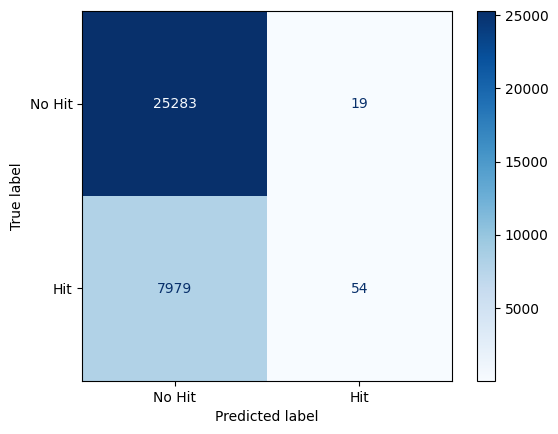

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
# Generate confusion matrix
cm = confusion_matrix(y_test.to_numpy(), y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Hit", "Hit"])
disp.plot(cmap="Blues")

In [41]:
at_bats = df.with_columns(hits=pl.col("single")+pl.col("double")+pl.col("triple")+pl.col("hr")).filter(pl.col("ab")==1).collect()

px.histogram(at_bats, x="batter", y="hits", histfunc="sum", title="Hits per batter", color="hits")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'hits=0<br>batter=%{x}<br>sum of hits=%{y}<extra></extra>',
              'legendgroup': '0',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['duraj001', 'stort001', 'yoshm002', ..., 'garcl006', 'woodj004',
                          'yepej001'], shape=(126159,), dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'),
                    'dtype': 'i1'},
              'yaxis': 'y'},
             {'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'hits=1<br>batter=%{x}<br>sum of hits=%{y}<extra></extra>',
              'legendgroup': '1',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '1',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['oneit001', 'casat001', 'mcgur002', ..., 'bohma001', 'milld003',
                          'baked003'], shape=(40513,), dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQ' ... 'EBAQEBAQEBAQEBAQEBAQEBAQEBAQ=='),
                    'dtype': 'i1'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'hits'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Hits per batter'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'batter'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [1, 0],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'sum of hits'}}}
})